In [1]:
import beatfinder
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

Device: cpu


# Import a dataset

In [13]:
precomputation_path = './data/precomputations/test/'
dataset = beatfinder.datasets.BALLROOM(precomputation_path, force_nb_samples=3)

N = 10 #len(dataset)
idxs = np.random.permutation(len(dataset))[:N]
dataset = beatfinder.datasets.SubAudioBeatsDataset(dataset, idxs)

In [14]:
dataset.augment()

In [15]:
dataset.precompute()

100.00% | ETA: 0:00:00 | Media-105819.002                                

In [16]:
dataset.save('./data/saved-dataset/test.ab')

# Load a saved dataset

In [17]:
dataset = beatfinder.datasets.AudioBeatsDataset(file='./data/saved-dataset/test.ab')

# Import model

In [19]:
model = beatfinder.model.BeatFinder()
model.load_state_dict(torch.load('./data/pretrained-models/model_07.pt', map_location=device))
model.eval()
model.freeze()

# Look at an example

2/10


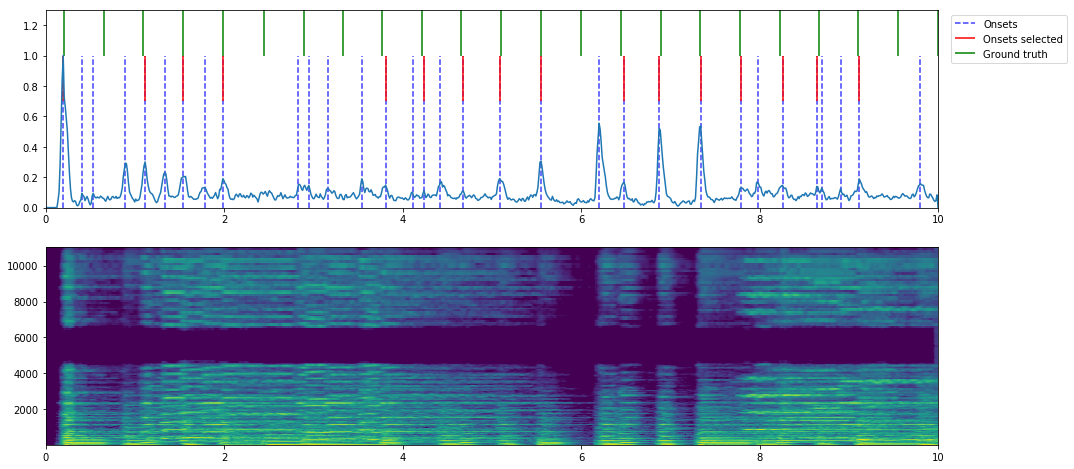

In [20]:
i = 2 #np.random.randint(len(dataset))
print(f'{i}/{len(dataset)}')
audiobeats = dataset[i]
beatfinder.display.showdata(audiobeats)

In [ ]:
clicks = beatfinder.display.clicks(audiobeats.get_wav(), audiobeats.get_beats())
Audio(clicks, rate=beatfinder.constants.sr)

F measure: 0.95


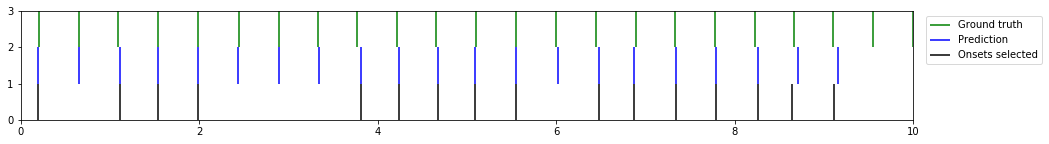

In [21]:
spec, onsets, isbeat, beats = audiobeats.get_data()
onsets_selected = beatfinder.utils.onsets_selected(onsets, isbeat)
pred_beats, bpm = beatfinder.utils.beat_track(onsets_selected)
beatfinder.display.showprediction(beats, pred_beats, onsets_selected)
print(f'F measure: {beatfinder.utils.F_measure(beats, pred_beats):.2f}')

F measure: 0.30


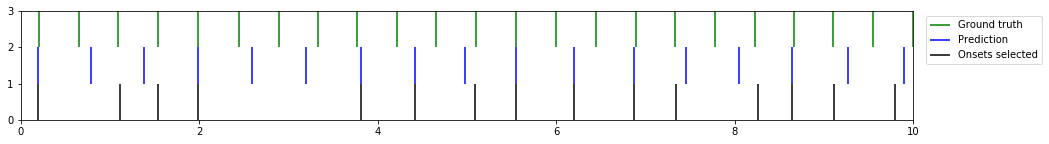

In [22]:
onsets_selected, beats_pred, bpm = beatfinder.utils.predict_beats(model, audiobeats, totensor)
beatfinder.display.showprediction(beats, beats_pred, onsets_selected)
F = beatfinder.utils.F_measure(beats, beats_pred)
if F != None:
    print(f'F measure: {F:.2f}')
else:
    print('F measure: NaN')

In [ ]:
wav = audiobeats.get_wav()
clicks = beatfinder.display.clicks(wav, beats_pred)
Audio(clicks, rate=beatfinder.constants.sr)

# Evaluate the dataset

In [23]:
F, F_nan = beatfinder.utils.F_measure_from_dataset(model, dataset, totensor)
print()
print(f'F measure: {F:.2f}')
print(f'     NaNs: {F_nan}')

 0 :  NaN |  1 : 0.47 |  2 : 0.30 |  3 : 0.19 |  4 : 1.00 |  5 : 1.00 |  6 : 0.97 |  7 : 1.00 | 
 8 : 0.47 |  9 : 0.38 | 
F measure: 0.64
     NaNs: 1
